In [32]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('data/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [26]:
df.drop(['Unnamed: 0', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis = 1, inplace = True)
df.columns = ('date', 'price', 'volume', 'small', 'medium', 'large', 'type', 'year', 'region')

In [31]:
df['date'] = pd.to_datetime(df.date)
df.sort_values(by='date', inplace = True)
df.head(5)

,date,price,volume,small,medium,large,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,organic,2015,Boise


Get test and control sample sizes

In [7]:
vcon = sum(df[df.type == 'conventional'].volume)
vorg = sum(df[df.type == 'organic'].volume)
print('total conventional volume:', vcon)
print('total organic volume:', vorg)
print('conventional rows:', len(df[df.type == 'conventional']))
print('organic rows:', len(df[df.type == 'organic']))

total conventional volume: 15087220911.309977
total organic volume: 436181682.09000045
conventional rows: 9126
organic rows: 9123


Get average price for each

In [14]:
meancon = scipy.mean(df[df.type == 'conventional'].price)
meanorg = scipy.mean(df[df.type == 'organic'].price)
print('conventional mean:', meancon)
print('organic mean:', meanorg)

conventional mean: 1.1580396668858208
organic mean: 1.6539986846432095


T test

In [16]:
scipy.stats.ttest_ind(df[df.type == 'conventional'].price, df[df.type == 'organic'].price)

Ttest_indResult(statistic=-105.58784823721108, pvalue=0.0)

Plot both over time

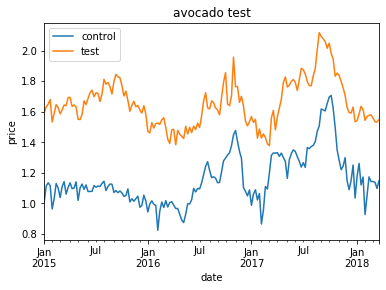

In [37]:
ax = df[df.type == 'conventional'][
    ['date', 'price']].groupby('date').mean().plot()
df[df.type == 'organic'][
    ['date', 'price']].groupby('date').mean().plot(ax=ax)
plt.legend(['control', 'test'])
plt.title('avocado test')
plt.ylabel('price')
plt.show()

In [58]:
for date in df.date.unique():
    df2 = df[df.date == date]
    print(pd.to_datetime(date).date(), stats.ttest_ind(df2[df2.type == 'organic'].price,
                          df2[df2.type == 'conventional'].price))

2015-01-04 Ttest_indResult(statistic=14.215390467091085, pvalue=2.6302311632222954e-26)
2015-01-11 Ttest_indResult(statistic=10.695342930596592, pvalue=1.510138057422983e-18)
2015-01-18 Ttest_indResult(statistic=10.599176751224851, pvalue=2.4872568933026e-18)
2015-01-25 Ttest_indResult(statistic=13.6014105350864, pvalue=5.487326012853494e-25)
2015-02-01 Ttest_indResult(statistic=13.989758413521836, pvalue=7.994654851104713e-26)
2015-02-08 Ttest_indResult(statistic=15.215278401816777, pvalue=2.044940655797481e-28)
2015-02-15 Ttest_indResult(statistic=14.510411244462576, pvalue=6.200459987319623e-27)
2015-02-22 Ttest_indResult(statistic=13.353028290975049, pvalue=1.8966175363056176e-24)
2015-03-01 Ttest_indResult(statistic=13.863740992428522, pvalue=1.4910704192030968e-25)
2015-03-08 Ttest_indResult(statistic=14.154073433525443, pvalue=3.55597740539502e-26)
2015-03-15 Ttest_indResult(statistic=13.170055903644101, pvalue=4.747504342389362e-24)
2015-03-22 Ttest_indResult(statistic=14.24833

2016-11-27 Ttest_indResult(statistic=6.164833467424398, pvalue=1.3005322907124765e-08)
2016-12-04 Ttest_indResult(statistic=8.191126142861538, pvalue=6.311202954544283e-13)
2016-12-11 Ttest_indResult(statistic=7.120314953972296, pvalue=1.3426800495048546e-10)
2016-12-18 Ttest_indResult(statistic=8.023939792277872, pvalue=1.474809313011358e-12)
2016-12-25 Ttest_indResult(statistic=7.07253781378501, pvalue=1.6969622232130605e-10)
2017-01-01 Ttest_indResult(statistic=9.590912481119963, pvalue=4.67552765351228e-16)
2017-01-08 Ttest_indResult(statistic=8.026653914752346, pvalue=1.4546695467697366e-12)
2017-01-15 Ttest_indResult(statistic=7.514895982905589, pvalue=1.9063129309232076e-11)
2017-01-22 Ttest_indResult(statistic=6.805136681157925, pvalue=6.232219221101981e-10)
2017-01-29 Ttest_indResult(statistic=7.253162832705166, pvalue=6.983352536719937e-11)
2017-02-05 Ttest_indResult(statistic=10.152794651775661, pvalue=2.526517416268132e-17)
2017-02-12 Ttest_indResult(statistic=7.81823521729

### Conventional or Organic Avocados
Are consumers willing to pay more for organic avocados? While many produce items may be improved by gentler treatment, [health websites](https://www.livestrong.com/slideshow/1008640-16-foods-dont-always-need-buy-organic/?slide=3) have it that there is essentially no difference between organic and conventional avocados. Despite this, a simple change in label could induce consumers to pay potentially half again as much as they normally would for an avocado.

The data above are actual prices of conventional and organic avocados, and it shows about a 50% price increase from conventional to organic with consistenly significant differences in price over three years. The variable of interest is the price of each.

Groups will be randomly divided into halves, and each will be asked the price they would expect on either a conventional or organic avocado. Each group will only be asked for a response on one of the two types. If there are enough respondents, it could be worthwhile to divide into three groups and ask the third for expected prices on both types. Price means will be compared between types, and if the price of organic avocados is over 5% greater than conventional avocados with 95% confidence, the distributors will relabel at least part of the conventional avocados as organic.